In [83]:
import tensorflow as tf
from tensorflow import keras


In [5]:
tf.__version__
keras.__version__

'2.10.0'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Keras originally stores the image arrays as 28x28 matrices w/ pixel intensities represented as integers

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Creating the Model Using the Sequential API
- A Sequential model is the simplest kind of Keras model, for NNs composed of single stack of layers, connected sequentially
- Flatten layer converts input image to 1D array
    - input layer, doesn't have parameters, just preprocessing
- Dense hidden layer manages its own weight matrix and vector of bias terms
- Final layer is dense output w/ 1 neuron per clas using softmax since the classes are exclusive

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.layers
hidden1 = model.layers[1].name
weights, biases = model.get_layer(hidden1).get_weights()

Model weights are initialized randomly to break symmetry, w/ biases initialized to zero. A different initialization method can be set with kernel_initializer or bias_initializer

In [54]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = "sgd",
              metrics=["accuracy"])
model_cloned = keras.models.clone_model(model)
model_cloned.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics=["accuracy"])

We will use many other losses, optimizers and met‐ rics in this book, but for the full lists see https://keras.io/losses/, https://keras.io/optimizers/ and https://keras.io/metrics/ \
First, we use the "sparse_categorical_crossen tropy" loss because we have sparse labels (i.e., for each instance there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the "categorical_crossentropy" loss instead. If we were doing binary classi‐ fication (with one or more binary labels), then we would use the "sigmoid" (i.e., logistic) activation function in the output layer instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss


* Can convert sparse labels (class indices) to one-hot vector labesl w/ keras.utils.to_categorical() or np.argmax() fcn w/ axis = 1

"sgd" means model will be trained with Stochastic Gradient Descent to perform backpropagation

### Training and Evaluating the Model
Model is ready to be trained w/ fit()

In [55]:
history = model.fit(X_train, y_train, epochs = 50,
                    validation_data = (X_valid, y_valid),
                    workers=2)

Epoch 1/50
1719/1719 [==============================] - 10s 5ms/step - loss: 0.0794 - accuracy: 0.9735 - val_loss: 0.3367 - val_accuracy: 0.8982
Epoch 2/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0797 - accuracy: 0.9723 - val_loss: 0.3471 - val_accuracy: 0.8978
Epoch 3/50
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0796 - accuracy: 0.9735 - val_loss: 0.3451 - val_accuracy: 0.8992
Epoch 4/50
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0773 - accuracy: 0.9735 - val_loss: 0.3433 - val_accuracy: 0.8994
Epoch 5/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0754 - accuracy: 0.9745 - val_loss: 0.3452 - val_accuracy: 0.9018
Epoch 6/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0752 - accuracy: 0.9738 - val_loss: 0.3928 - val_accuracy: 0.8900
Epoch 7/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0739 - accuracy: 0.9751 - val_loss: 0.3435 - val_accura

In [44]:
history_cloned = model_cloned.fit(X_train, y_train, epochs = 30,
                    validation_data = (X_valid, y_valid),
                    workers=2)

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7060 - accuracy: 0.7658 - val_loss: 0.4935 - val_accuracy: 0.8370
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4894 - accuracy: 0.8313 - val_loss: 0.4423 - val_accuracy: 0.8504
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4447 - accuracy: 0.8438 - val_loss: 0.4214 - val_accuracy: 0.8572
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4169 - accuracy: 0.8536 - val_loss: 0.4310 - val_accuracy: 0.8534
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3979 - accuracy: 0.8598 - val_loss: 0.4044 - val_accuracy: 0.8588
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3798 - accuracy: 0.8647 - val_loss: 0.3736 - val_accuracy: 0.8692
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3669 - accuracy: 0.8699 - val_loss: 0.3785 - val_accuracy:

History object returned by fit() contains training params(history.params), epochs (history.epcoch), and a dictionary (history.history) containing the loss and extra metrics measured at the end of each epoch. Can use Pandas to plot

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

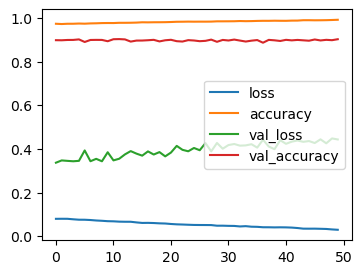

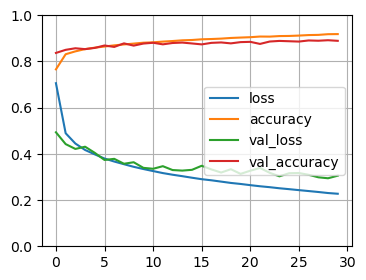

In [56]:
pd.DataFrame(history.history).plot(figsize = (4,3))
pd.DataFrame(history_cloned.history).plot(figsize=(4,3))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

model was trained more compared with model_cloned. it should perform much better

In [48]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 99.0828 - accuracy: 0.8518


[99.08284759521484, 0.8518000245094299]

### Using the Model to Make Predictions

In [53]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

1/1 [==============================] - 0s 41ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Building a Regression MLP Using the Sequential API
- Main differences between building classification and regression:
    - Output layer has a single neuron (to predict a single value)
    - Uses no activation function
    - Loss function is mean squared error

In [138]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [151]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [103]:

model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", 
    input_shape=X_train_scaled.shape[1:]), keras.layers.Dense(1)   
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train_scaled, y_train, epochs=50,
                    validation_data=(X_valid_scaled, y_valid),
                    workers=2)
mse_test = model.evaluate(X_test_scaled, y_test)
X_new = X_test_scaled[:3]
y_pred = model.predict(X_new)

Epoch 1/50
363/363 [==============================] - 2s 3ms/step - loss: 1.1087 - val_loss: 0.8258
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5665 - val_loss: 0.5096
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4997 - val_loss: 0.4841
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4734 - val_loss: 0.4566
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4576 - val_loss: 0.4478
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4478 - val_loss: 0.4369
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4414 - val_loss: 0.4299
Epoch 8/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4354 - val_loss: 0.4262
Epoch 9/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4307 - val_loss: 0.4203
Epoch 10/50
363/363 [==============================] - 1s 3ms/step - loss: 0.4259 - val_loss: 0.4155

In [104]:
y_pred

array([[2.15674  ],
       [0.7498647],
       [3.602102 ]], dtype=float32)

## Building Complex Models Using the Functional API

In [127]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(30, activation="relu")(hidden2)
concat = keras.layers.Concatenate()([input, hidden3])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

-Notice how layers are used like functions once they are created. For example: in hidden1, the input layer is passed in to tell the layer where to connect to
-Concatenate is used to connect input and hidden2 layers


In [129]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train_scaled,  y_train, epochs=30,
                    validation_data=(X_valid_scaled, y_valid),
                    workers=2)
mse_test = model.evaluate(X_test_scaled, y_test)
X_new = X_test_scaled[:3]
y_pred = model.predict(X_new)

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 0.2995 - val_loss: 0.4650
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2985 - val_loss: 0.3288
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2972 - val_loss: 0.3268
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2950 - val_loss: 0.3550
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2939 - val_loss: 0.3314
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2965 - val_loss: 0.3226
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2925 - val_loss: 0.3987
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2918 - val_loss: 0.3790
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2909 - val_loss: 0.4383
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.2900 - val_loss: 0.3962

You may want to send a subset of the features through one path and a different (possibly overlapping) subset through a deep path. See below

In [150]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])
model.compile(loss="mse", optimizer="sgd")

In [152]:


X_train_A, X_train_B = X_train_scaled[:, :5], X_train_scaled[:, 2:]
X_valid_A, X_valid_B = X_valid_scaled[:, :5], X_valid_scaled[:, 2:]
X_test_A, X_test_B = X_test_scaled[:, :5], X_test_scaled[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [ ]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid),
                    workers=2)
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

You may also want multiple outputs:
- Maybe you want to locate and classify the main object in a picture. This is a regression and classification task
- May have multiple independent tasks to perform based on teh same data
    - Can use same neural network for different tasks due to ability to learn features in data
- As a regularization technique (i.e. a training constraint whose objective is to reduce overfitting and thus improve the model's ability to generalize)

In [156]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

Each output needs its own loss function -> need to pass a list of losses
- We care more about the main output's loss  so will give it a much greater weight

In [157]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
history = model.fit(
        [X_train_A, X_train_B], [y_train, y_train], epochs=40,
        validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
        workers=2)

Epoch 1/40
363/363 [==============================] - 3s 6ms/step - loss: 0.9710 - dense_99_loss: 0.8329 - dense_100_loss: 2.2137 - val_loss: 0.6113 - val_dense_99_loss: 0.5345 - val_dense_100_loss: 1.3029
Epoch 2/40
363/363 [==============================] - 1s 3ms/step - loss: 0.5996 - dense_99_loss: 0.5341 - dense_100_loss: 1.1885 - val_loss: 0.5521 - val_dense_99_loss: 0.4933 - val_dense_100_loss: 1.0808
Epoch 3/40
363/363 [==============================] - 1s 4ms/step - loss: 0.5577 - dense_99_loss: 0.5057 - dense_100_loss: 1.0253 - val_loss: 0.5299 - val_dense_99_loss: 0.4820 - val_dense_100_loss: 0.9614
Epoch 4/40
363/363 [==============================] - 2s 4ms/step - loss: 0.5138 - dense_99_loss: 0.4702 - dense_100_loss: 0.9063 - val_loss: 0.4987 - val_dense_99_loss: 0.4595 - val_dense_100_loss: 0.8519
Epoch 5/40
363/363 [==============================] - 1s 3ms/step - loss: 0.4960 - dense_99_loss: 0.4609 - dense_100_loss: 0.8113 - val_loss: 0.4853 - val_dense_99_loss: 0.4530

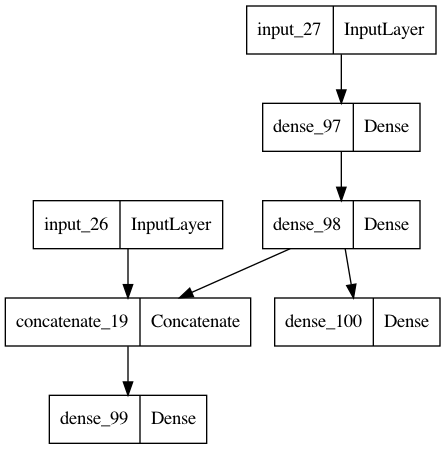

In [158]:
tf.keras.utils.plot_model(model)

In [159]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 99ms/step


# Building Dynamic Models Using the Subclassing API
- Sequential and Functional API are declarative: declare which layers to use and connections -> start feeding model data
- Advantages: model can easily be saved, cloned, shared, its structure displayed and analyzed, errors can be caught early, easy to debug
- Disadvantages: its static
- Using Subclassing API, can add loops, varying shapes, conditional branching and other dynamic behaviors